In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('cricket_data.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df = df.dropna()

In [5]:
df.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 1172 non-null   object
 1   Player_Name          1172 non-null   object
 2   Matches_Batted       1172 non-null   object
 3   Not_Outs             1172 non-null   object
 4   Runs_Scored          1172 non-null   object
 5   Highest_Score        1172 non-null   object
 6   Batting_Average      1172 non-null   object
 7   Balls_Faced          1172 non-null   object
 8   Batting_Strike_Rate  1172 non-null   object
 9   Centuries            1172 non-null   object
 10  Half_Centuries       1172 non-null   object
 11  Fours                1172 non-null   object
 12  Sixes                1172 non-null   object
 13  Catches_Taken        1172 non-null   object
 14  Stumpings            1172 non-null   object
 15  Matches_Bowled       1172 non-null   object
 16  Balls_

In [14]:
selected_cols = ['Runs_Scored', 'Batting_Average', 'Centuries']

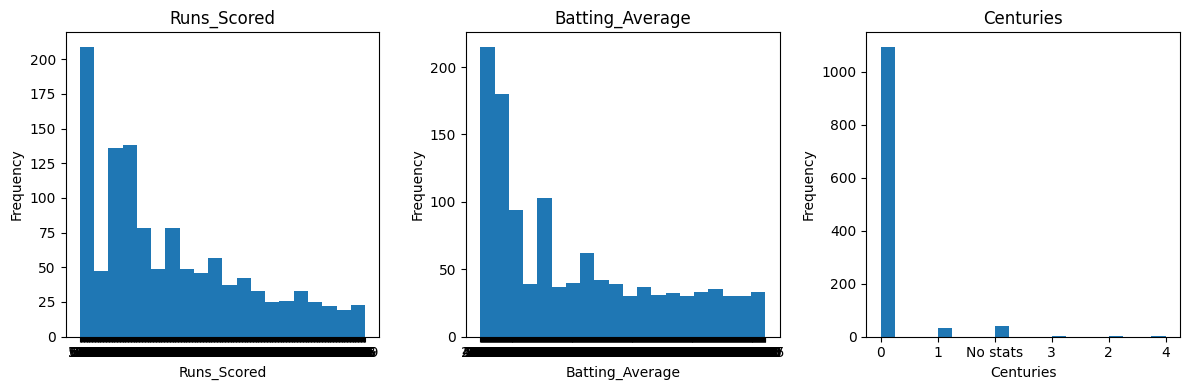

In [15]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(selected_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=20)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [17]:
for col in selected_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=selected_cols)

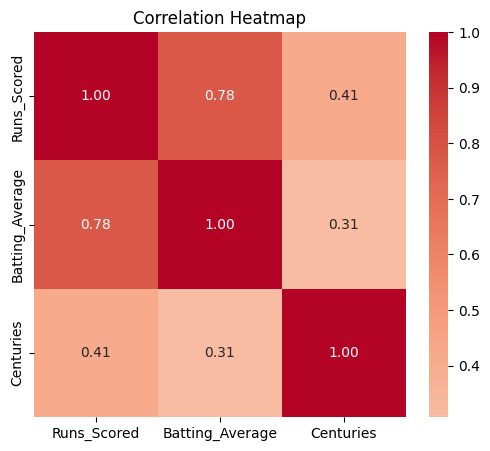

In [18]:
correlation_matrix = df[selected_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()